In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm

In [2]:
# Loading the dataset
df = pd.read_csv("life_expectancy.csv")

In [3]:
# Displaying first few rows
print (df.head()) 

       Country  Year      Status  Population  Hepatitis B  Measles  Polio  \
0  Afghanistan  2015  Developing  33736494.0         65.0     1154    6.0   
1  Afghanistan  2014  Developing    327582.0         62.0      492   58.0   
2  Afghanistan  2013  Developing  31731688.0         64.0      430   62.0   
3  Afghanistan  2012  Developing   3696958.0         67.0     2787   67.0   
4  Afghanistan  2011  Developing   2978599.0         68.0     3013   68.0   

   Diphtheria  HIV/AIDS  infant deaths  under-five deaths  Total expenditure  \
0        65.0       0.1             62                 83               8.16   
1        62.0       0.1             64                 86               8.18   
2        64.0       0.1             66                 89               8.13   
3        67.0       0.1             69                 93               8.52   
4        68.0       0.1             71                 97               7.87   

          GDP   BMI  thinness  1-19 years  Alcohol  Scho

In [4]:
# Displaying descriptive statistics of the dataset
print(df.describe())

              Year    Population  Hepatitis B        Measles        Polio  \
count  2848.000000  2.204000e+03  2306.000000    2848.000000  2829.000000   
mean   2007.500000  1.283457e+07    81.076756    2083.082163    82.682220   
std       4.610582  6.196094e+07    25.019068   10249.107207    23.434954   
min    2000.000000  3.400000e+01     1.000000       0.000000     3.000000   
25%    2003.750000  1.967585e+05    77.000000       0.000000    78.000000   
50%    2007.500000  1.391756e+06    92.000000      16.000000    93.000000   
75%    2011.250000  7.438947e+06    97.000000     336.750000    97.000000   
max    2015.000000  1.293859e+09    99.000000  212183.000000    99.000000   

        Diphtheria     HIV/AIDS  infant deaths  under-five deaths  \
count  2829.000000  2848.000000    2848.000000        2848.000000   
mean     82.451396     1.756461      28.359902          39.500000   
std      23.693936     5.148935     117.188032         159.800866   
min       2.000000     0.10000

In [5]:
# Displaying information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2848 non-null   object 
 1   Year                  2848 non-null   int64  
 2   Status                2848 non-null   object 
 3   Population            2204 non-null   float64
 4   Hepatitis B           2306 non-null   float64
 5   Measles               2848 non-null   int64  
 6   Polio                 2829 non-null   float64
 7   Diphtheria            2829 non-null   float64
 8   HIV/AIDS              2848 non-null   float64
 9   infant deaths         2848 non-null   int64  
 10  under-five deaths     2848 non-null   int64  
 11  Total expenditure     2627 non-null   float64
 12  GDP                   2406 non-null   float64
 13  BMI                   2816 non-null   float64
 14  thinness  1-19 years  2816 non-null   float64
 15  Alcohol              

In [6]:
# Duplicates
df = df.drop_duplicates()

In [7]:
# Data Cleaning and Feature Engineering
missing_values = df.isnull().sum()
print(missing_values)

Country                   0
Year                      0
Status                    0
Population              644
Hepatitis B             542
Measles                   0
Polio                    19
Diphtheria               19
HIV/AIDS                  0
infant deaths             0
under-five deaths         0
Total expenditure       221
GDP                     442
BMI                      32
thinness  1-19 years     32
Alcohol                 188
Schooling               160
Life expectancy           0
dtype: int64


In [8]:
# Handling Missing Values
df["Population"].fillna(df["Population"].mean(), inplace=True)

In [9]:
df["Hepatitis B"].fillna(df["Hepatitis B"].mean(), inplace=True)

In [10]:
df["Polio"].fillna(df["Polio"].mean(), inplace=True)
df["Diphtheria"].fillna(df["Diphtheria"].mean(), inplace=True)
df["Total expenditure"].fillna(df["Total expenditure"].mean(), inplace=True)
df["GDP"].fillna(df["GDP"].mean(), inplace=True)
df["BMI"].fillna(df["BMI"].mean(), inplace=True)
df["thinness  1-19 years"].fillna(df["thinness  1-19 years"].mean(), inplace=True)
df["Alcohol"].fillna(df["Alcohol"].mean(), inplace=True)
df["Schooling"].fillna(df["Schooling"].mean(), inplace=True)

In [11]:
print(df.head())

       Country  Year      Status  Population  Hepatitis B  Measles  Polio  \
0  Afghanistan  2015  Developing  33736494.0         65.0     1154    6.0   
1  Afghanistan  2014  Developing    327582.0         62.0      492   58.0   
2  Afghanistan  2013  Developing  31731688.0         64.0      430   62.0   
3  Afghanistan  2012  Developing   3696958.0         67.0     2787   67.0   
4  Afghanistan  2011  Developing   2978599.0         68.0     3013   68.0   

   Diphtheria  HIV/AIDS  infant deaths  under-five deaths  Total expenditure  \
0        65.0       0.1             62                 83               8.16   
1        62.0       0.1             64                 86               8.18   
2        64.0       0.1             66                 89               8.13   
3        67.0       0.1             69                 93               8.52   
4        68.0       0.1             71                 97               7.87   

          GDP   BMI  thinness  1-19 years  Alcohol  Scho

In [12]:
# Checking the missing values again
#missing_values = df.isnull().sum()
#print(missing_values)

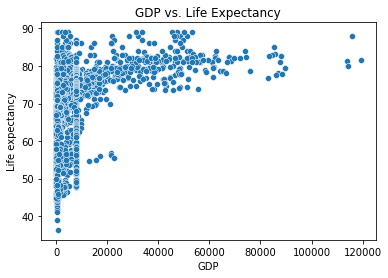

In [16]:
# Key findings and insights
sns.scatterplot(x='GDP', y='Life expectancy', data=df)
plt.title('GDP vs. Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life expectancy')
plt.show()

In [17]:
# Hypothesis Formulation
schooling_hypothesis = "Higher schooling levels are positively associated with life expectancy"
healthcare_hypothesis = "Countries with higher healthcare expenditure per capita have higher life expectancy"
tech_hypothesis = "Countries with higher healthcare expenditure per capita have higher life expectancy"

In [20]:
# Significance Test
schooling_group = df[df['Schooling'] >= df['Schooling'].mean()]
non_schooling_group = df[df['Schooling'] < df['Schooling'].mean()]

t_stat, p_value = ttest_ind(schooling_group['Life expectancy'], non_schooling_group['Life expectancy'])
if p_value<0.5:
    result = ("statistically significant")
else:
    result = ("Not statistically significant")
    
print(f"The t-statistic is {t_stat:.2f} and the p-value is {p_value:.4f}")
print(f"The relationship between education and life expectancy is {result}")

The t-statistic is 44.92 and the p-value is 0.0000
The relationship between education and life expectancy is statistically significant


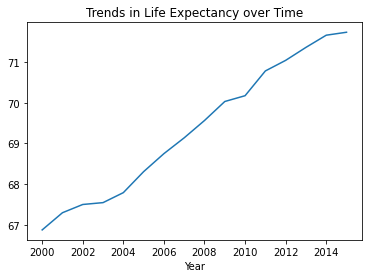

In [23]:
# Suggestions for next steps
# Time Series Analysis
time_series_data = df.groupby('Year').mean()
time_series_data['Life expectancy'].plot()
plt.title('Trends in Life Expectancy over Time')
plt.show()

In [26]:
# Multivariate regression analysis
X = df[['GDP', 'Total expenditure', 'Schooling']]
X = sm.add_constant(X)
y = df['Life expectancy']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     1066.
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:26:50   Log-Likelihood:                -9387.9
No. Observations:                2848   AIC:                         1.878e+04
Df Residuals:                    2844   BIC:                         1.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                44.7118      0.53